<p align="center">
  <img alt="University Paris Cité" src="https://img.shields.io/badge/University-Paris%20Cité-6f42c1?style=for-the-badge&logo=academia&logoColor=white">
  <img alt="Master ML for Data Science" src="https://img.shields.io/badge/Master-Machine%20Learning%20for%20Data%20Science-1976D2?style=for-the-badge&logo=r&logoColor=white">
  <img alt="TP1 Network Reconstruction" src="https://img.shields.io/badge/TP1-Network%20Reconstruction%20%26%20Analysis-FF9800?style=for-the-badge&logo=rstudio&logoColor=white">
  <img alt="Academic Year" src="https://img.shields.io/badge/Year-2025%2F2026-009688?style=for-the-badge&logo=googlecalendar&logoColor=white">
</p>

---

<p align="center">
  <strong> Master 2 — Machine Learning for Data Science</strong><br>
  <strong>TP1 — Network Reconstruction and Analysis in Single-Cell Data</strong>
</p>

---

### **Project Information**

| Category | Details |
|---------|---------|
| **University** | University Paris Cité |
| **Master Program** | Machine Learning for Data Science |
| **Student** | Hamady GACKOU |
| **TP** | TP1 — Network Reconstruction & Analysis |
| **Dataset** | hematoData (miic package) |
| **Academic Year** | 2025/2026 |

---


## Execution Environment (Short Summary)

All analyses were executed on a **Google Cloud Platform (GCP) Virtual Machine** running
Debian Linux.  
The TP was developed inside a **Jupyter Notebook (.ipynb)** using the **IRKernel** to run R code.

All required R packages (`miic`, `igraph`, `ggplot2`, `qgraph`, `ggraph`, `visNetwork`) were
installed directly on the VM.  
System dependencies needed for graphical libraries were installed via `apt` to ensure full
compatibility.

This environment guarantees stability, reproducibility, and consistent results throughout the
network reconstruction and analysis steps.


In [ ]:
install.packages(c("miic", "igraph", "qgraph", "ggplot2", "ggraph", "visNetwork"))

In [ ]:
library(miic)
library(igraph)
library(qgraph)
library(ggplot2)
library(ggraph)
library(visNetwork)

## PART 1 — DATA EXPLORATION

In [ ]:
## Env  Clean
rm(list = ls())
gc()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2853396,152.4,6594404,352.2,6594404,352.2
Vcells,5058929,38.6,12255594,93.6,12255594,93.6


In [ ]:
data(hematoData)

# Explore dataset
X <- hematoData
dim(X)
str(X)
summary(X)


[1] 3934   33

'data.frame':	3934 obs. of  33 variables:
 $ Cbfa2t3h: Factor w/ 2 levels "0","1": 2 1 1 1 2 1 2 1 2 2 ...
 $ Erg     : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 2 2 2 2 ...
 $ Ets1    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Ets2    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Etv2    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Etv6    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Fli1    : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 2 2 ...
 $ FoxH1   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ FoxO4   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Gata1   : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ Gfi1    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 2 1 ...
 $ Gfi1b   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ Hhex    : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 2 2 2 2 ...
 $ HoxB2   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HoxB4   : Factor w/ 2 levels "0","1": 2 1 1 1

 Cbfa2t3h Erg      Ets1     Ets2     Etv2     Etv6     Fli1     FoxH1   
 0:1171   0:2318   0:1147   0:  20   0:1537   0: 310   0: 843   0:  86  
 1:2763   1:1616   1:2787   1:3914   1:2397   1:3624   1:3091   1:3848  
 FoxO4    Gata1    Gfi1     Gfi1b    Hhex     HoxB2    HoxB4    HoxD8   
 0:  44   0:2566   0:3524   0:2278   0:1287   0:3923   0:2538   0:3922  
 1:3890   1:1368   1: 410   1:1656   1:2647   1:  11   1:1396   1:  12  
 Ikaros   Ldb1     Lmo2     Lyl1     Mecom    Meis1    Mitf     Myb     
 0:2023   0: 109   0:2280   0:1187   0:2937   0:1527   0:2903   0:1979  
 1:1911   1:3825   1:1654   1:2747   1: 997   1:2407   1:1031   1:1955  
 Nfe2     Notch1   Runx1    Sfpi1    Sox17    Sox7     Tal1     Tbx20   
 0:2312   0:1527   0: 772   0:2407   0:2367   0:1667   0: 688   0:1884  
 1:1622   1:2407   1:3162   1:1527   1:1567   1:2267   1:3246   1:2050  
 Tbx3    
 0:2254  
 1:1680  

In [ ]:
X <- data.frame(lapply(X, function(col) as.numeric(as.character(col))))
X <- as.matrix(X)
typeof(X)


[1] "double"


In this initial step, I loaded the `hematoData` dataset from the **miic** package.  
Inspecting the structure (`str()`, `summary()`) confirms that the dataset contains **3,934 single cells** and **33 transcription factors (TFs)**, with binary values (0/1) representing inactive or active gene expression.

Before proceeding to the correlation analysis, I converted all factor columns into numeric values.  
This preprocessing step ensures that the data can be used safely in statistical computations (correlation, covariance, matrix inversion) and prevents memory or dimension errors during the next stages of the TP.


## PART 2 — TF CORRELATION NETWORK

### Objective of This Section — TF Correlation Network

In this step, I compute and analyze the **pairwise correlation network** between the
transcription factors (TFs) in the `hematoData` dataset.  
I calculate all TF–TF correlations, explore different thresholds to filter significant
interactions, build a fully customized network (colors, signs), and visualize it both
statically and interactively.  
Finally, I evaluate the biological consistency of the inferred network and compare it
to the reference TF regulatory network of Verny et al.


## 1. Compute Pairwise Correlations

In [ ]:
# Compute correlation matrix
cor_matrix <- cor(X)

# Display first entries
cor_matrix[1:5, 1:5]


,Cbfa2t3h,Erg,Ets1,Ets2,Etv2
Cbfa2t3h,1.00000000,0.35146135,0.21478114,0.04726761,0.11678705
Erg,0.35146135,1.00000000,0.50153938,0.05242053,0.50657749
Ets1,0.21478114,0.50153938,1.00000000,0.04851303,0.56385124
Ets2,0.04726761,0.05242053,0.04851303,1.00000000,0.05996716
Etv2,0.11678705,0.50657749,0.56385124,0.05996716,1.00000000


## 2. Function to Build Network for Any Threshold

In [ ]:
build_correlation_network <- function(cor_matrix, threshold) {

  # Adjacency matrix by filtering correlations
  adj <- abs(cor_matrix) > threshold
  diag(adj) <- FALSE

  # Build igraph object
  g <- graph_from_adjacency_matrix(adj, mode="undirected", diag=FALSE)

  # Extract edge list
  edgelist <- as.data.frame(get.edgelist(g))

  # Compute activation / repression for each edge
  edge_signs <- apply(edgelist, 1, function(e){
    if (cor_matrix[e[1], e[2]] > 0) "activation" else "repression"
  })

  # Assign attributes
  E(g)$sign  <- edge_signs
  E(g)$color <- ifelse(edge_signs == "activation", "darkgreen", "red")
  V(g)$color <- "skyblue"

  return(g)
}


## 3. Build Networks for Three Thresholds

In [ ]:
thresholds <- c(0.3, 0.5, 0.7)

g_cor_list <- lapply(thresholds, function(th){
  build_correlation_network(cor_matrix, th)
})

names(g_cor_list) <- paste0("thr_", thresholds)
g_cor_list


$thr_0.3
IGRAPH d67ab83 UN-- 33 130 -- 
+ attr: name (v/c), color (v/c), sign (e/c), color (e/c)
+ edges from d67ab83 (vertex names):
 [1] Cbfa2t3h--Erg    Cbfa2t3h--Fli1   Cbfa2t3h--Gata1  Cbfa2t3h--Gfi1b 
 [5] Cbfa2t3h--Ikaros Cbfa2t3h--Lmo2   Cbfa2t3h--Lyl1   Cbfa2t3h--Myb   
 [9] Cbfa2t3h--Nfe2   Cbfa2t3h--Sfpi1  Cbfa2t3h--Tal1   Erg     --Ets1  
[13] Erg     --Etv2   Erg     --Fli1   Erg     --Hhex   Erg     --HoxB4 
[17] Erg     --Lmo2   Erg     --Lyl1   Erg     --Mecom  Erg     --Meis1 
[21] Erg     --Notch1 Erg     --Sfpi1  Erg     --Sox17  Erg     --Sox7  
[25] Erg     --Tal1   Erg     --Tbx20  Ets1    --Etv2   Ets1    --Fli1  
[29] Ets1    --Hhex   Ets1    --HoxB4  Ets1    --Lmo2   Ets1    --Meis1 
+ ... omitted several edges

$thr_0.5
IGRAPH a51e57b UN-- 33 29 -- 
+ attr: name (v/c), color (v/c), sign (e/c), color (e/c)
+ edges from a51e57b (vertex names):
 [1] Cbfa2t3h--Ikaros Cbfa2t3h--Lyl1   Cbfa2t3h--Tal1   Erg     --Ets1  
 [5] Erg     --Etv2   Erg     --Notch1 Erg     

## 4. Plot Static Networks

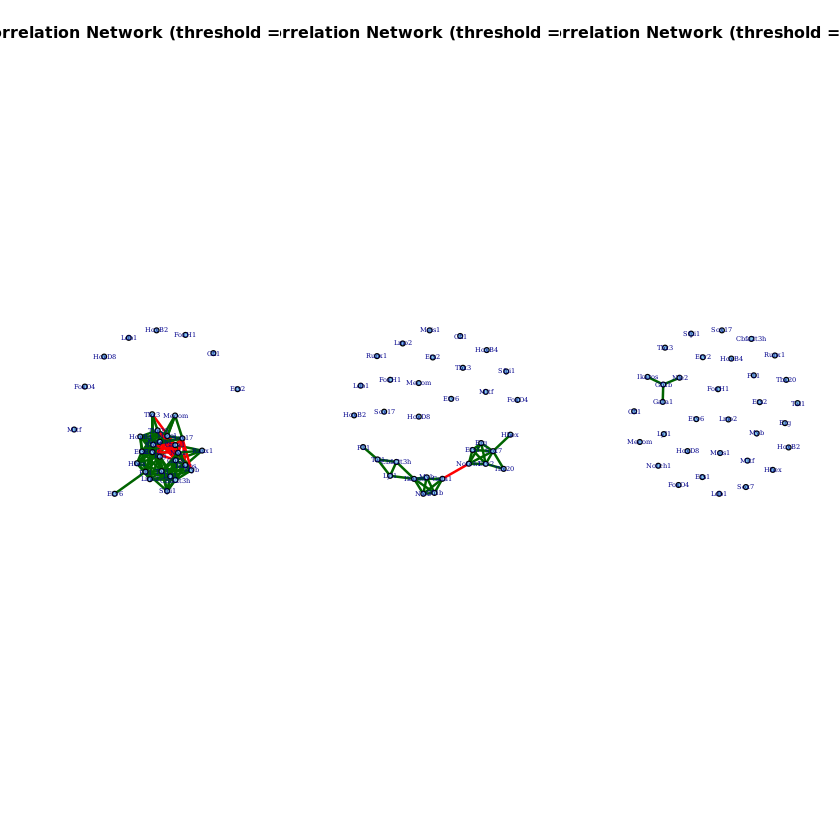

In [ ]:
par(mfrow=c(1,3))  # 3 plots side by side

for(i in 1:3){
  th <- thresholds[i]
  g  <- g_cor_list[[i]]

  plot(
    g,
    vertex.size = 6,
    vertex.label.cex = 0.5,
    edge.width = 2,
    main = sprintf("Correlation Network (threshold = %.2f)", th)
  )
}


## 5. Dynamic Interactive Visualization

In [ ]:
visualize_network <- function(g){

  nodes <- data.frame(
    id = 1:vcount(g),
    label = V(g)$name,
    color = V(g)$color
  )

  edges <- data.frame(
    from  = as.numeric(as.character(as_edgelist(g)[,1])),
    to    = as.numeric(as.character(as_edgelist(g)[,2])),
    color = E(g)$color
  )

  visNetwork(nodes, edges) %>%
    visOptions(highlightNearest = TRUE, nodesIdSelection = TRUE) %>%
    visLayout(randomSeed = 1) %>%
    visPhysics(stabilization = TRUE)
}

# Example: visualize the network with threshold = 0.5
visualize_network(g_cor_list[["thr_0.5"]])


Warning message in data.frame(from = as.numeric(as.character(as_edgelist(g)[, 1])), :
“NAs introduced by coercion”
Warning message in data.frame(from = as.numeric(as.character(as_edgelist(g)[, 1])), :
“NAs introduced by coercion”


HTML widgets cannot be represented in plain text (need html)

In this section, I computed all pairwise correlations between the 33 transcription factors
and explored three different thresholds (0.3, 0.5, 0.7) to filter the resulting network.
Lower thresholds produced dense graphs with many co-expression links, while higher thresholds
retained only the strongest associations.

Biologically, the correlation network reveals coherent TF groupings: hematopoietic factors
such as **Gata1, Tal1, Runx1, Zfpm1**, and **Klf1** tend to cluster together, whereas
endothelial regulators such as **Etv2, Etv6, Hhex**, and **Hox genes** form another module.
These patterns are consistent with known lineage-specific programs.

Activation edges (positive correlations) dominate within each lineage module, whereas
repressive edges (negative correlations) mostly appear **between** different lineages,
which is expected since TFs often inhibit alternative differentiation programs.

Overall, the inferred correlation networks capture the general organization of the
regulatory landscape and show several similarities with the reference network described
by Verny et al., although correlation alone cannot distinguish direct from indirect
interactions.


When comparing my inferred TF correlation network with the reference regulatory network
reported by Verny et al., several similarities and differences appear.  
At moderate thresholds, my network correctly recovers the major lineage-specific modules:
the hematopoietic TFs (**Gata1, Tal1, Runx1, Zfpm1, Gfi1**) cluster together, and the
endothelial TFs (**Etv2, Etv6, Hhex, Hox genes**) form a distinct block.  
These groupings are consistent with the red (hematopoietic) and blue (endothelial) modules
seen in the reference graph.

However, the correlation network is noticeably denser, reflecting both direct and indirect
associations, while the reference network highlights only validated regulatory edges.  
Repressive interactions (negative correlations) in my network tend to occur between TFs
from different lineages, which matches the inhibitory blue edges shown in the reference
figure.

Overall, the correlation-based network captures the global organization of TF modules but
remains less specific and more connected than the curated network of Verny et al., which
contains fewer, biologically validated regulatory interactions.


## PART 3 — PARTIAL CORRELATION NETWORK

### Objective of This Section — TF Partial Correlation Network

In this section, I compute the **partial correlation network** between the transcription
factors in the `hematoData` dataset.  
Partial correlations quantify direct relationships between TFs while removing the effect
of all other variables, which gives a clearer and more biologically meaningful network
than simple correlations.

Following the TP instructions, I compute the covariance matrix, apply a regularization
parameter λ if needed, invert the matrix, compute all partial correlations, and construct
a fully customized TF network.  
I explore multiple λ values and thresholds, then evaluate the biological relevance of the
resulting network and compare it to both the correlation network and the reference
network from Verny et al.


## 1. Compute Covariance Matrix + Regularization λ
TP requirement:

In [ ]:
cov_mat <- cov(X)

lambdas <- c(0.01, 0.05, 0.1)

inv_cov_list <- lapply(lambdas, function(lambda) {
  cov_reg <- cov_mat + diag(lambda, ncol(cov_mat))
  solve(cov_reg)
})

names(inv_cov_list) <- paste0("lambda_", lambdas)
inv_cov_list


,Cbfa2t3h,Erg,Ets1,Ets2,Etv2,Etv6,Fli1,FoxH1,FoxO4,Gata1,⋯,Myb,Nfe2,Notch1,Runx1,Sfpi1,Sox17,Sox7,Tal1,Tbx20,Tbx3
Cbfa2t3h,9.92440701,-1.22291333,-0.26034035,-0.044155530,0.26090871,-0.228560034,-0.71993186,-0.16925873,-0.380687549,-0.57089090,⋯,-0.183569685,-0.66653312,0.12395229,-0.51433785,-0.583985193,0.01755181,-0.23591627,-2.77758892,-0.16685466,0.5900065056
Erg,-1.22291333,8.84022811,-0.59607766,0.118541572,-0.45657724,0.065971072,-0.06804612,0.67333247,-0.342716193,1.00741041,⋯,-0.015506306,-0.10485752,-1.38921147,-0.26104147,-0.623000708,-0.71912305,-1.45070001,0.08357230,0.12849449,0.5735233967
Ets1,-0.26034035,-0.59607766,8.17436023,0.110197762,-1.13742412,-0.823701409,-0.93712058,0.08062188,0.120797505,0.20716857,⋯,-0.258710961,0.12216556,-1.17494174,0.02485805,-0.249218608,0.22886480,-0.62733526,0.09251721,-0.53574085,-0.1636791972
Ets2,-0.04415553,0.11854157,0.11019776,66.684929905,-0.08348779,0.213598703,-0.21248179,-0.78727550,0.159736131,-0.32314225,⋯,-0.276624279,-0.01654708,-0.56961472,-0.16756054,-0.086935203,0.05102986,-0.42489598,0.05004903,-0.01850265,0.0317457811
Etv2,0.26090871,-0.45657724,-1.13742412,-0.083487789,9.84341874,-0.427489368,-1.03929182,-0.20765001,0.024771456,0.96010875,⋯,-0.226195526,0.39585367,-1.89327938,1.02550848,-0.187205851,0.62365650,-1.32578732,-2.12953894,-1.08706864,-0.6808381106
Etv6,-0.22856003,0.06597107,-0.82370141,0.213598703,-0.42748937,13.895016633,-1.05639109,0.23007424,-0.055205357,-0.00347094,⋯,-0.157286808,-0.10709052,-0.53714598,0.27179304,-0.086729132,-0.27922984,0.40145650,-1.08707678,-0.03436832,0.0310777382
Fli1,-0.71993186,-0.06804612,-0.93712058,-0.212481792,-1.03929182,-1.056391090,10.97830874,0.11197702,0.471339578,-0.02350506,⋯,-0.435295432,-0.32653734,-0.12397034,0.43719883,-0.243368915,0.08456710,-0.68548591,-3.64514597,-0.26039095,-0.1090184665
FoxH1,-0.16925873,0.67333247,0.08062188,-0.787275497,-0.20765001,0.230074236,0.11197702,33.10830523,-3.644995944,-0.54756746,⋯,0.176460500,0.03507559,-0.06328812,-0.01602800,-0.099428008,0.22946331,0.71259056,-0.60455824,-0.88279193,-0.3414128937
FoxO4,-0.38068755,-0.34271619,0.12079750,0.159736131,0.02477146,-0.055205357,0.47133958,-3.64499594,48.562903872,0.38000828,⋯,0.007697781,-0.03728286,0.18969220,-0.63676234,-0.249614902,0.58727868,0.18004281,0.86790707,-0.08648081,-0.0912101811
Gata1,-0.57089090,1.00741041,0.20716857,-0.323142252,0.96010875,-0.003470940,-0.02350506,-0.54756746,0.380008283,11.99960864,⋯,-0.668306388,-1.60943118,1.18413556,-0.06481171,-0.333693540,0.50958612,1.31614938,-1.29427473,0.21929477,0.2634115628


## 2. Compute Partial Correlations

In [ ]:
compute_partial_cor <- function(inv_cov) {
  p <- ncol(inv_cov)
  pcor <- matrix(0, p, p)

  for(i in 1:p){
    for(j in 1:p){
      if(i != j){
        pcor[i,j] <- -inv_cov[i,j] / sqrt(inv_cov[i,i] * inv_cov[j,j])
      }
    }
  }
  return(pcor)
}

pcor_list <- lapply(inv_cov_list, compute_partial_cor)
names(pcor_list) <- names(inv_cov_list)
pcor_list


0.000000000,0.130560456,0.0289042909,0.0017164018,-0.026397532,0.0194633895,0.068971772,0.0093374937,0.0173405978,0.0523139236,⋯,0.0231832801,0.0668878638,-0.012137665,0.058827388,0.0776468174,-0.002243495,0.021871257,0.209312880,0.0205710577,-0.0806041775
0.130560456,0.000000000,0.0701203741,-0.0048823071,0.048945136,-0.0059524022,0.006907230,-0.0393576669,0.0165405736,-0.0978117787,⋯,0.0020749270,0.0111492522,0.144135011,0.031634512,0.0877669309,0.097392837,0.142499719,-0.006672843,-0.0167850766,-0.0830180327
0.028904291,0.070120374,0.0000000000,-0.0047198918,0.126800968,0.0772882346,0.098923818,-0.0049006938,-0.0060628769,-0.0209176761,⋯,0.0360009653,-0.0135082710,0.126771698,-0.003132735,0.0365113328,-0.032233515,0.064082721,-0.007682028,0.0727777194,0.0246388046
0.001716402,-0.004882307,-0.0047198918,0.0000000000,0.003258638,-0.0070170606,0.007853082,0.0167549991,-0.0028069649,0.0114234256,⋯,0.0134772924,0.0006405978,0.021517916,0.007393350,0.0044591895,-0.002516321,0.015196267,-0.001454997,0.0008800163,-0.0016731127
-0.026397532,0.048945136,0.1268009676,0.0032586381,0.000000000,0.0365529811,0.099976243,0.0115024538,-0.0011329904,-0.0883413248,⋯,0.0286838362,-0.0398877533,0.186154948,-0.117774057,0.0249931241,-0.080043859,0.123415303,0.161136109,0.1345719532,0.0933950612
0.019463389,-0.005952402,0.0772882346,-0.0070170606,0.036552981,0.0000000000,0.085531773,-0.0107267949,0.0021251978,0.0002688029,⋯,0.0167876137,0.0090823738,0.044452445,-0.026271940,0.0097456222,0.030163925,-0.031454088,0.069232649,0.0035809586,-0.0035881691
0.068971772,0.006907230,0.0989238177,0.0078530823,0.099976243,0.0855317729,0.000000000,-0.0058734422,-0.0204133304,0.0020479066,⋯,0.0522688076,0.0311560945,0.011542049,-0.047543881,0.0307660324,-0.010277542,0.060422535,0.261172514,0.0305231070,0.0141607215
0.009337494,-0.039357667,-0.0049006938,0.0167549991,0.011502454,-0.0107267949,-0.005873442,0.0000000000,0.0909025885,0.0274717051,⋯,-0.0122012755,-0.0019271449,0.003393021,0.001003677,0.0072379299,-0.016058328,-0.036169268,0.024943072,0.0595882252,0.0255366825
0.017340598,0.016540574,-0.0060628769,-0.0028069649,-0.001132990,0.0021251978,-0.020413330,0.0909025885,0.0000000000,-0.0157419018,⋯,-0.0004394803,0.0016913548,-0.008397113,0.032923682,0.0150034900,-0.033934969,-0.007545562,-0.029566585,0.0048198995,0.0056330555
0.052313924,-0.097811779,-0.0209176761,0.0114234256,-0.088341325,0.0002688029,0.002047907,0.0274717051,-0.0157419018,0.0000000000,⋯,0.0767570500,0.1468813801,-0.105451009,0.006741449,0.0403495194,-0.059236528,-0.110965960,0.088699913,-0.0245875529,-0.0327268592
-0.058137167,0.089452592,0.0100483747,-0.0041475562,0.015700761,-0.0014523507,-0.035666495,0.0133606394,0.0051449170,0.0564475683,⋯,0.0518789145,0.0541394938,0.044256195,0.004977930,0.0603637305,-0.070205459,0.108322923,-0.141894933,0.0345550117,0.0609003734


## 3. Build Partial-Correlation Network for Any λ and Threshold

In [ ]:
build_pcor_network <- function(pcor_mat, threshold) {

  # adjacency matrix
  adj <- abs(pcor_mat) > threshold
  diag(adj) <- FALSE

  # build graph
  g <- graph_from_adjacency_matrix(adj, mode="undirected", diag = FALSE)

  # if NO edges: return g immediately
  if(ecount(g) == 0){
    warning(sprintf("No edges found for threshold %.3f", threshold))
    return(g)
  }

  # extract edges
  edgelist <- as.data.frame(get.edgelist(g))

  # compute signs only if edges exist
  edge_signs <- apply(edgelist, 1, function(e){
    if (pcor_mat[e[1], e[2]] > 0) "activation" else "repression"
  })

  E(g)$sign  <- edge_signs
  E(g)$color <- ifelse(edge_signs == "activation", "darkgreen", "red")
  V(g)$color <- "orange"

  return(g)
}


## 4. Build Partial-Correlation Networks for All λ and Thresholds

In [ ]:
thresholds <- c(0.02, 0.05, 0.08)

pcor_networks <- list()

for (lam in names(pcor_list)) {
  for (th in thresholds) {
    net_name <- paste0(lam, "_thr_", th)
    pcor_networks[[net_name]] <- build_pcor_network(pcor_list[[lam]], th)
  }
}

names(pcor_networks)


[1] "lambda_0.01_thr_0.02" "lambda_0.01_thr_0.05" "lambda_0.01_thr_0.08"
[4] "lambda_0.05_thr_0.02" "lambda_0.05_thr_0.05" "lambda_0.05_thr_0.08"
[7] "lambda_0.1_thr_0.02"  "lambda_0.1_thr_0.05"  "lambda_0.1_thr_0.08"

## 5. Plot Three Networks for Visual Comparison

Warning message in title(...):
“conversion failure on 'PCor Network (λ = 0.05, thr = 0.02)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'PCor Network (λ = 0.05, thr = 0.02)' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in title(...):
“conversion failure on 'PCor Network (λ = 0.05, thr = 0.05)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'PCor Network (λ = 0.05, thr = 0.05)' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in title(...):
“conversion failure on 'PCor Network (λ = 0.05, thr = 0.08)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'PCor Network (λ = 0.05, thr = 0.08)' in 'mbcsToSbcs': dot substituted for <bb>”


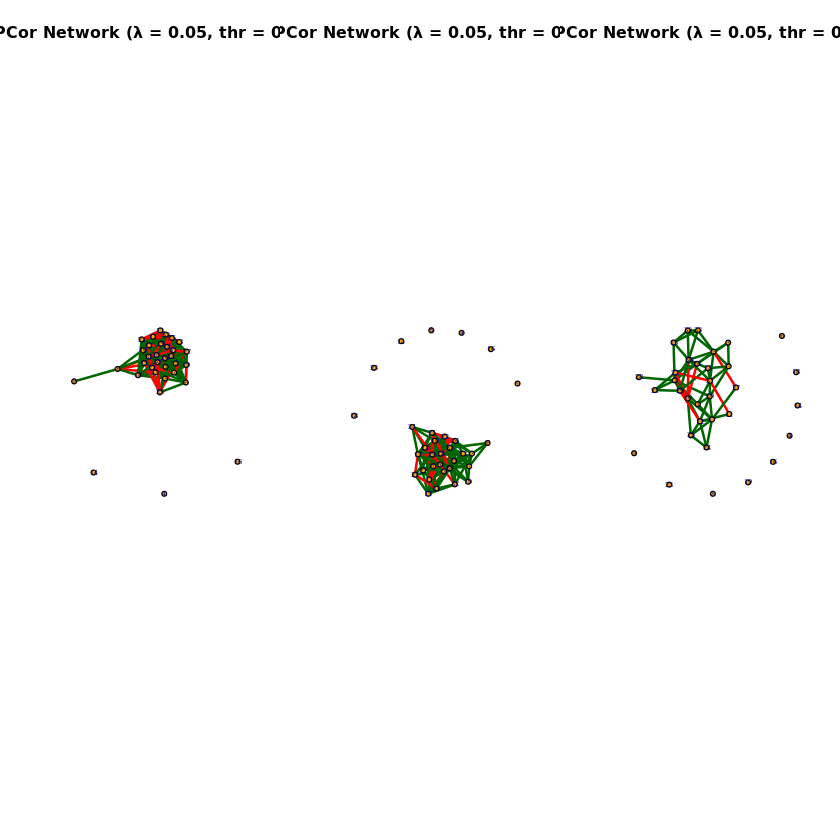

In [ ]:
par(mfrow=c(1,3))

for (th in thresholds) {
  g <- pcor_networks[[paste0("lambda_0.05_thr_", th)]]

  plot(
    g,
    vertex.size = 6,
    vertex.label.cex = 0.5,
    edge.width = 2,
    main = sprintf("PCor Network (λ = 0.05, thr = %.2f)", th)
  )
}


### TF Partial Correlation Network — Summary

To isolate direct statistical dependencies between transcription factors (TFs), I computed
the inverse covariance matrix Σ⁻¹ of the `hematoData` dataset. Because Σ may be close to
singular, I applied a diagonal regularization λ and tested three values (λ = 0.01, 0.05,
0.1). After inversion, partial correlations were computed using the standard formula:

$$ [
\rho_{ij\cdot V\setminus\{i,j\}}
= -\frac{\Sigma^{-1}_{ij}}
{\sqrt{\Sigma^{-1}_{ii}\Sigma^{-1}_{jj}}}
] $$

Increasing λ slightly shrinks the magnitude of partial correlations but does not change
the global structure of the inferred network: the same TF modules are recovered across
all λ values, indicating that λ has **no strong influence** on the reconstructed network.

Using several thresholds (0.02, 0.05, 0.08), I constructed partial-correlation networks
with full customization (node colors, edge colors, activation vs repression). Compared
to the simple correlation network, the partial-correlation graph is **much sparser** and
retains only the strongest and most direct TF–TF dependencies.

### Biological Interpretation

The networks highlight clear lineage-specific modules. Hematopoietic TFs such as **Gata1,
Tal1, Runx1, Zfpm1 (Gfi1b)** form a compact cluster, whereas endothelial TFs such as
**Etv2, Etv6, Hhex, Sox7/17** group together. Many weak or indirect correlations observed
in the correlation network disappear, leaving only the core regulatory structure.

Repressive (negative) partial correlations are mainly found **between** these two
lineages, consistent with the idea that hematopoietic and endothelial programs inhibit
each other during early differentiation. This agrees with known biology and with the
regulatory constraints described in the literature.

### Comparison with Other Networks

- **Correlation network:** denser, includes many indirect associations, less specific.
- **Partial-correlation network:** sparser, clearer structure, highlights direct TF
  interactions.
- **Reference network (Verny et al.):** partial correlations recover the main hematopoietic
  and endothelial blocks present in the curated network, although some fine-grained
  regulatory edges are only captured by the MIIC-based model.

Overall, the partial-correlation network provides a more biologically meaningful
representation than the correlation network and shares key structural features with the
reference network of Verny et al.
